# Load Libraries/Data

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz
#all_tzs = pytz.all_timezones
#len(all_tzs)

# import the statsmodels time series analysis api module
# seasonal decompose
import statsmodels.tsa.api as tsa

# get peaks (max point) of each season
from scipy.signal import find_peaks

#import holidays
!pip install holidays
import holidays
import datetime as dt
from holidays import country_holidays

import glob


import warnings
warnings.filterwarnings('ignore')

In [2]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2023.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2003.csv']

In [3]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
12244301,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN
11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
11630297,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479
12172257,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,1614,16.0,41.0,41.974061,-87.845200
11552670,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,HOTEL/MOTEL,False,True,1834,18.0,42.0,41.893652,-87.622726
...,...,...,...,...,...,...,...,...,...,...,...
3116762,12/31/2003 12:50:12 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003
3121312,12/31/2003 12:55:00 PM,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319
3112374,12/31/2003 12:55:00 AM,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656


In [4]:
df = df_combined.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7896895 entries, 12244301 to 3117261
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 617.5+ MB


In [5]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Clean Features

In [6]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
12244301,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN
11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
11630297,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479
12172257,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,1614,16.0,41.0,41.974061,-87.845200
11552670,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,HOTEL/MOTEL,False,True,1834,18.0,42.0,41.893652,-87.622726


## Convert 'Date' to datetime dtype

In [7]:
fmt = '%m/%d/%Y %I:%M:%S %p'

In [8]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [9]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
ID,,,,,,,,,,,,
12244301,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,2019-01-01 13:00:00
11553582,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,2019-01-01 01:00:00
11630297,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,2019-01-01 13:00:00
12172257,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,1614,16.0,41.0,41.974061,-87.845200,2019-01-01 13:00:00
11552670,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,HOTEL/MOTEL,False,True,1834,18.0,42.0,41.893652,-87.622726,2019-01-01 01:00:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7896895 entries, 12244301 to 3117261
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
 11  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 677.8+ MB


## Set 'Datetime' As Index

In [11]:
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,
2019-01-01 13:00:00,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN
2019-01-01 01:00:00,01/01/2019 01:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.94946,-87.651974


## Remove Unnecessary Columns

In [12]:
df.drop(columns='Date', inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN
2019-01-01 01:00:00,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.94946,-87.651974


# Task

## **1) Comparing Police Districts:**
- **Which district has the most crimes?** 
    - *District 8 has the most crime with 527,600 counts*


- **Which has the least?**
    - *District 21 has the least with 4 counts*

In [13]:
np.sort(df['Primary Type'].unique())

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'LIQUOR LAW VIOLATION',
       'MOTOR VEHICLE THEFT', 'NARCOTICS', 'NON - CRIMINAL',
       'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object)

In [14]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['DECEPTIVE PRACTICE' 'THEFT' 'CRIMINAL DAMAGE' 'CRIM SEXUAL ASSAULT'
 'BATTERY' 'BURGLARY' 'ASSAULT' 'WEAPONS VIOLATION' 'NARCOTICS'
 'LIQUOR LAW VIOLATION' 'OTHER OFFENSE' 'ROBBERY' 'SEX OFFENSE'
 'CRIMINAL TRESPASS' 'INTIMIDATION' 'MOTOR VEHICLE THEFT'
 'CRIMINAL SEXUAL ASSAULT' 'OFFENSE INVOLVING CHILDREN'
 'INTERFERENCE WITH PUBLIC OFFICER' 'PUBLIC PEACE VIOLATION' 'KIDNAPPING'
 'PROSTITUTION' 'STALKING' 'ARSON' 'CONCEALED CARRY LICENSE VIOLATION'
 'HOMICIDE' 'HUMAN TRAFFICKING' 'OBSCENITY' 'GAMBLING' 'NON-CRIMINAL'
 'OTHER NARCOTIC VIOLATION' 'PUBLIC INDECENCY'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM' 'NON - CRIMINAL'
 'DOMESTIC VIOLENCE']


36

In [15]:
df1 = df.copy()
df1

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN
2019-01-01 01:00:00,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479
2019-01-01 13:00:00,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,1614,16.0,41.0,41.974061,-87.845200
2019-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,False,True,1834,18.0,42.0,41.893652,-87.622726
...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003
2003-12-31 12:55:00,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319
2003-12-31 00:55:00,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656


In [16]:
len(df1['Primary Type'].unique())

36

### Get Counts of Districts

In [17]:
plot_1 = df1['District'].value_counts().sort_values()
plot_1

21.0         4
31.0       247
20.0    139990
17.0    227914
24.0    239081
22.0    258596
16.0    264630
14.0    305195
1.0     320885
15.0    337298
10.0    340230
5.0     349498
18.0    354903
19.0    355459
2.0     374467
9.0     385399
12.0    392315
3.0     400417
4.0     448262
25.0    448873
7.0     455085
6.0     461822
11.0    505982
8.0     530296
Name: District, dtype: int64

In [18]:
plot_1.values.sum()

7896848

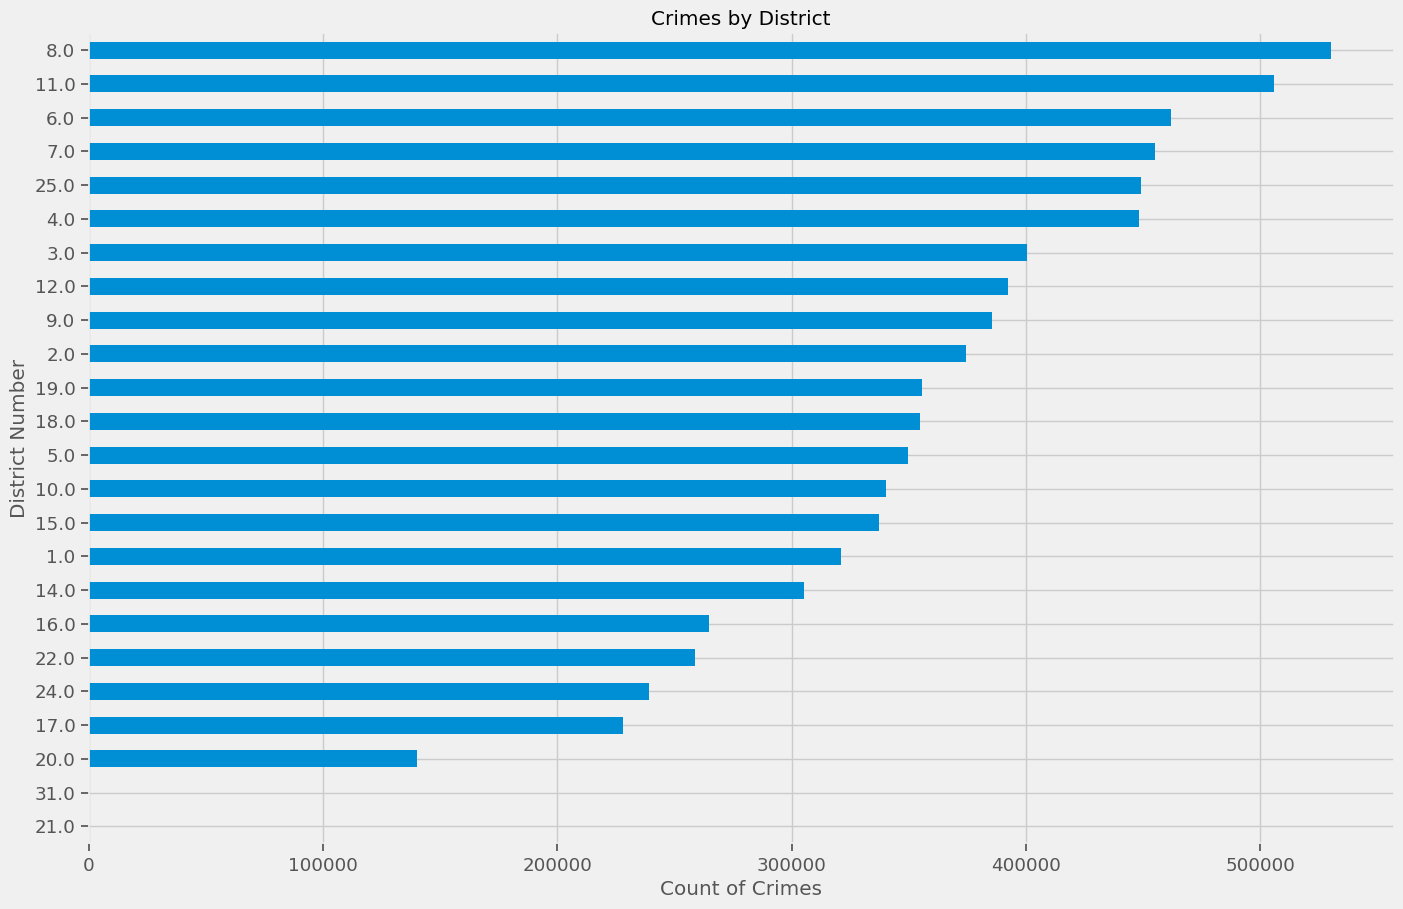

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_1.plot(kind='barh')

plt.xlabel('Count of Crimes')
plt.ylabel('District Number')
plt.title('Crimes by District');

- **Which district has the most crimes?** 
    - *District 8 has the most crime with 527,600 counts*


- **Which has the least?**
    - *District 21 has the least with 4 counts*

## **2) Crimes Across the Years:**
- **Is the total number of crimes increasing or decreasing across the years?**
    - *From 2001 to 2023, crime has decreased.*


- **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**
    - *Seems to be some crimes have trended up, in contrast to the general trend down:*

        - 'CONCEALED CARRY LICENSE VIOLATION'
        - 'DECEPTIVE PRACTICES'
        - 'HOMICIDE'
        - 'HUMAN TRAFFICKING'
        - 'VEHICLE THEFT' (very recently has spiked)
        - 'OBSCENITY'
        - 'STALKING'
        - 'WEAPONS VIOLATION'

### Crimes Increasing or Decreasing Across the Years?

In [20]:
df2 = df.copy()

In [21]:
df2['Year'] = df2.index.year

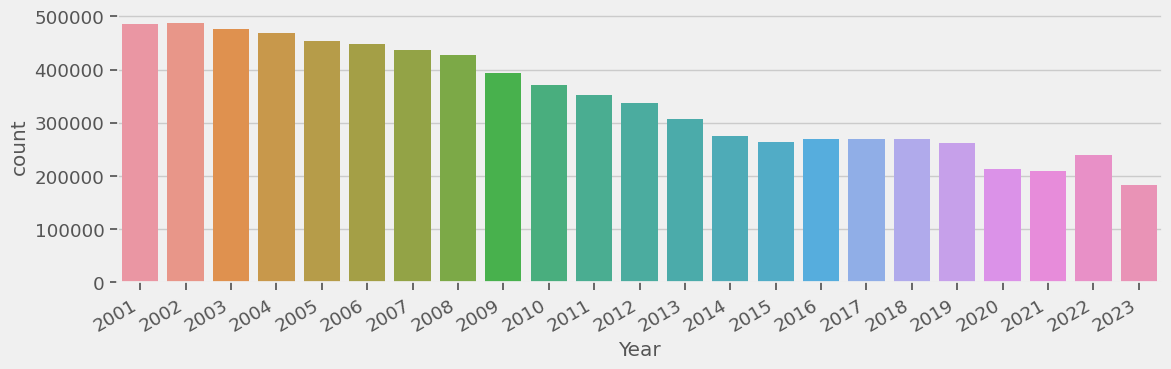

In [22]:
## Visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [23]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    183557
2022    238938
2021    208867
2020    212218
2019    261351
2018    268912
2017    269108
2016    269834
2015    264793
2014    275791
2013    307539
2012    336321
2011    351993
2010    370517
2009    392827
2008    427184
2007    437090
2006    448178
2005    453774
2004    469423
2003    475985
2002    486807
2001    485888
Name: Year, dtype: int64

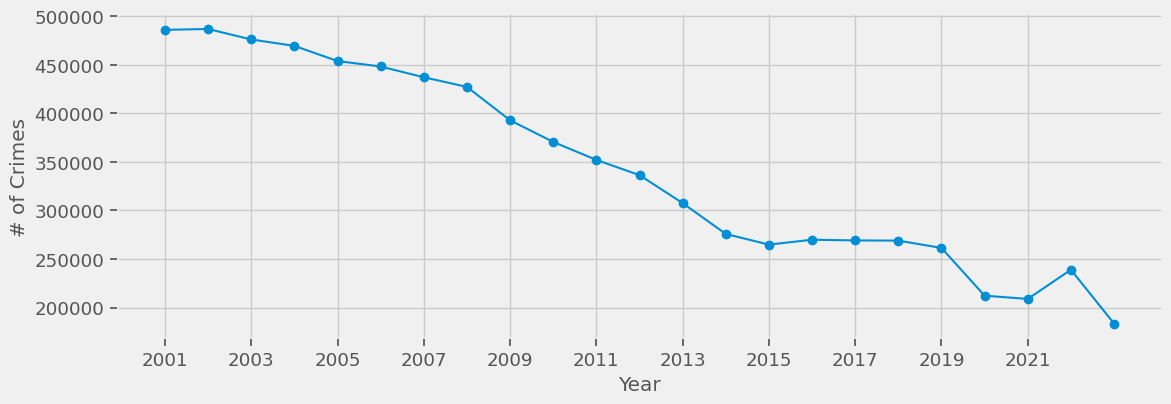

In [24]:
## save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

### Any Crimes Going Against the Overall Trend?

In [25]:
df2

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year
Datetime,,,,,,,,,,,
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,2019
2019-01-01 01:00:00,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,2019
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,2019
2019-01-01 13:00:00,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,1614,16.0,41.0,41.974061,-87.845200,2019
2019-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,False,True,1834,18.0,42.0,41.893652,-87.622726,2019
...,...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003,2003
2003-12-31 12:55:00,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319,2003
2003-12-31 00:55:00,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656,2003


In [26]:
plot_type = df2.groupby('Primary Type').resample('M').size()

In [27]:
plot_type = plot_type.unstack().T
plot_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,162.0,3966.0,3.0,1192.0,1398.0,1.0,44.0,42.0,NaN,36.0,18.0,75.0,101.0,2097.0,4714.0,NaN,NaN,NaN,2.0,246.0,1.0,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,134.0,3665.0,1.0,1063.0,1163.0,NaN,37.0,27.0,NaN,27.0,24.0,57.0,109.0,1785.0,4369.0,NaN,NaN,NaN,1.0,152.0,0.0,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,149.0,4617.0,4.0,1141.0,1313.0,NaN,55.0,37.0,NaN,22.0,22.0,72.0,147.0,2151.0,4862.0,NaN,NaN,NaN,2.0,195.0,0.0,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,132.0,4922.0,2.0,1133.0,1199.0,NaN,79.0,59.0,NaN,34.0,21.0,49.0,164.0,2120.0,4044.0,NaN,NaN,NaN,2.0,196.0,0.0,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8888.0,1997.0,1.0,155.0,4757.0,2.0,1067.0,1261.0,NaN,94.0,42.0,NaN,41.0,25.0,56.0,194.0,2197.0,4038.0,NaN,NaN,NaN,1.0,213.0,2.0,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,54.0,2016.0,3955.0,614.0,9.0,NaN,2586.0,147.0,390.0,1350.0,NaN,0.0,64.0,0.0,45.0,22.0,22.0,19.0,2430.0,333.0,NaN,1.0,NaN,4.0,170.0,NaN,1237.0,5.0,2.0,83.0,NaN,771.0,128.0,39.0,4711.0,819.0
2023-06-30,48.0,2025.0,3877.0,600.0,19.0,NaN,2632.0,143.0,364.0,1281.0,NaN,2.0,72.0,1.0,42.0,20.0,13.0,20.0,2557.0,388.0,NaN,1.0,NaN,2.0,121.0,NaN,1331.0,27.0,NaN,77.0,NaN,785.0,96.0,34.0,5040.0,788.0
2023-07-31,43.0,2043.0,4197.0,631.0,21.0,NaN,2957.0,160.0,395.0,1276.0,NaN,2.0,59.0,0.0,39.0,15.0,17.0,14.0,2619.0,406.0,NaN,NaN,NaN,3.0,131.0,NaN,1348.0,25.0,NaN,64.0,NaN,1009.0,131.0,57.0,5129.0,879.0


In [28]:
plot_type = plot_type.fillna(0.0)
plot_type.isna().sum().sum()

0

#### Yearly Trend Visualization per Crime

In [29]:
len(plot_type.columns)

36

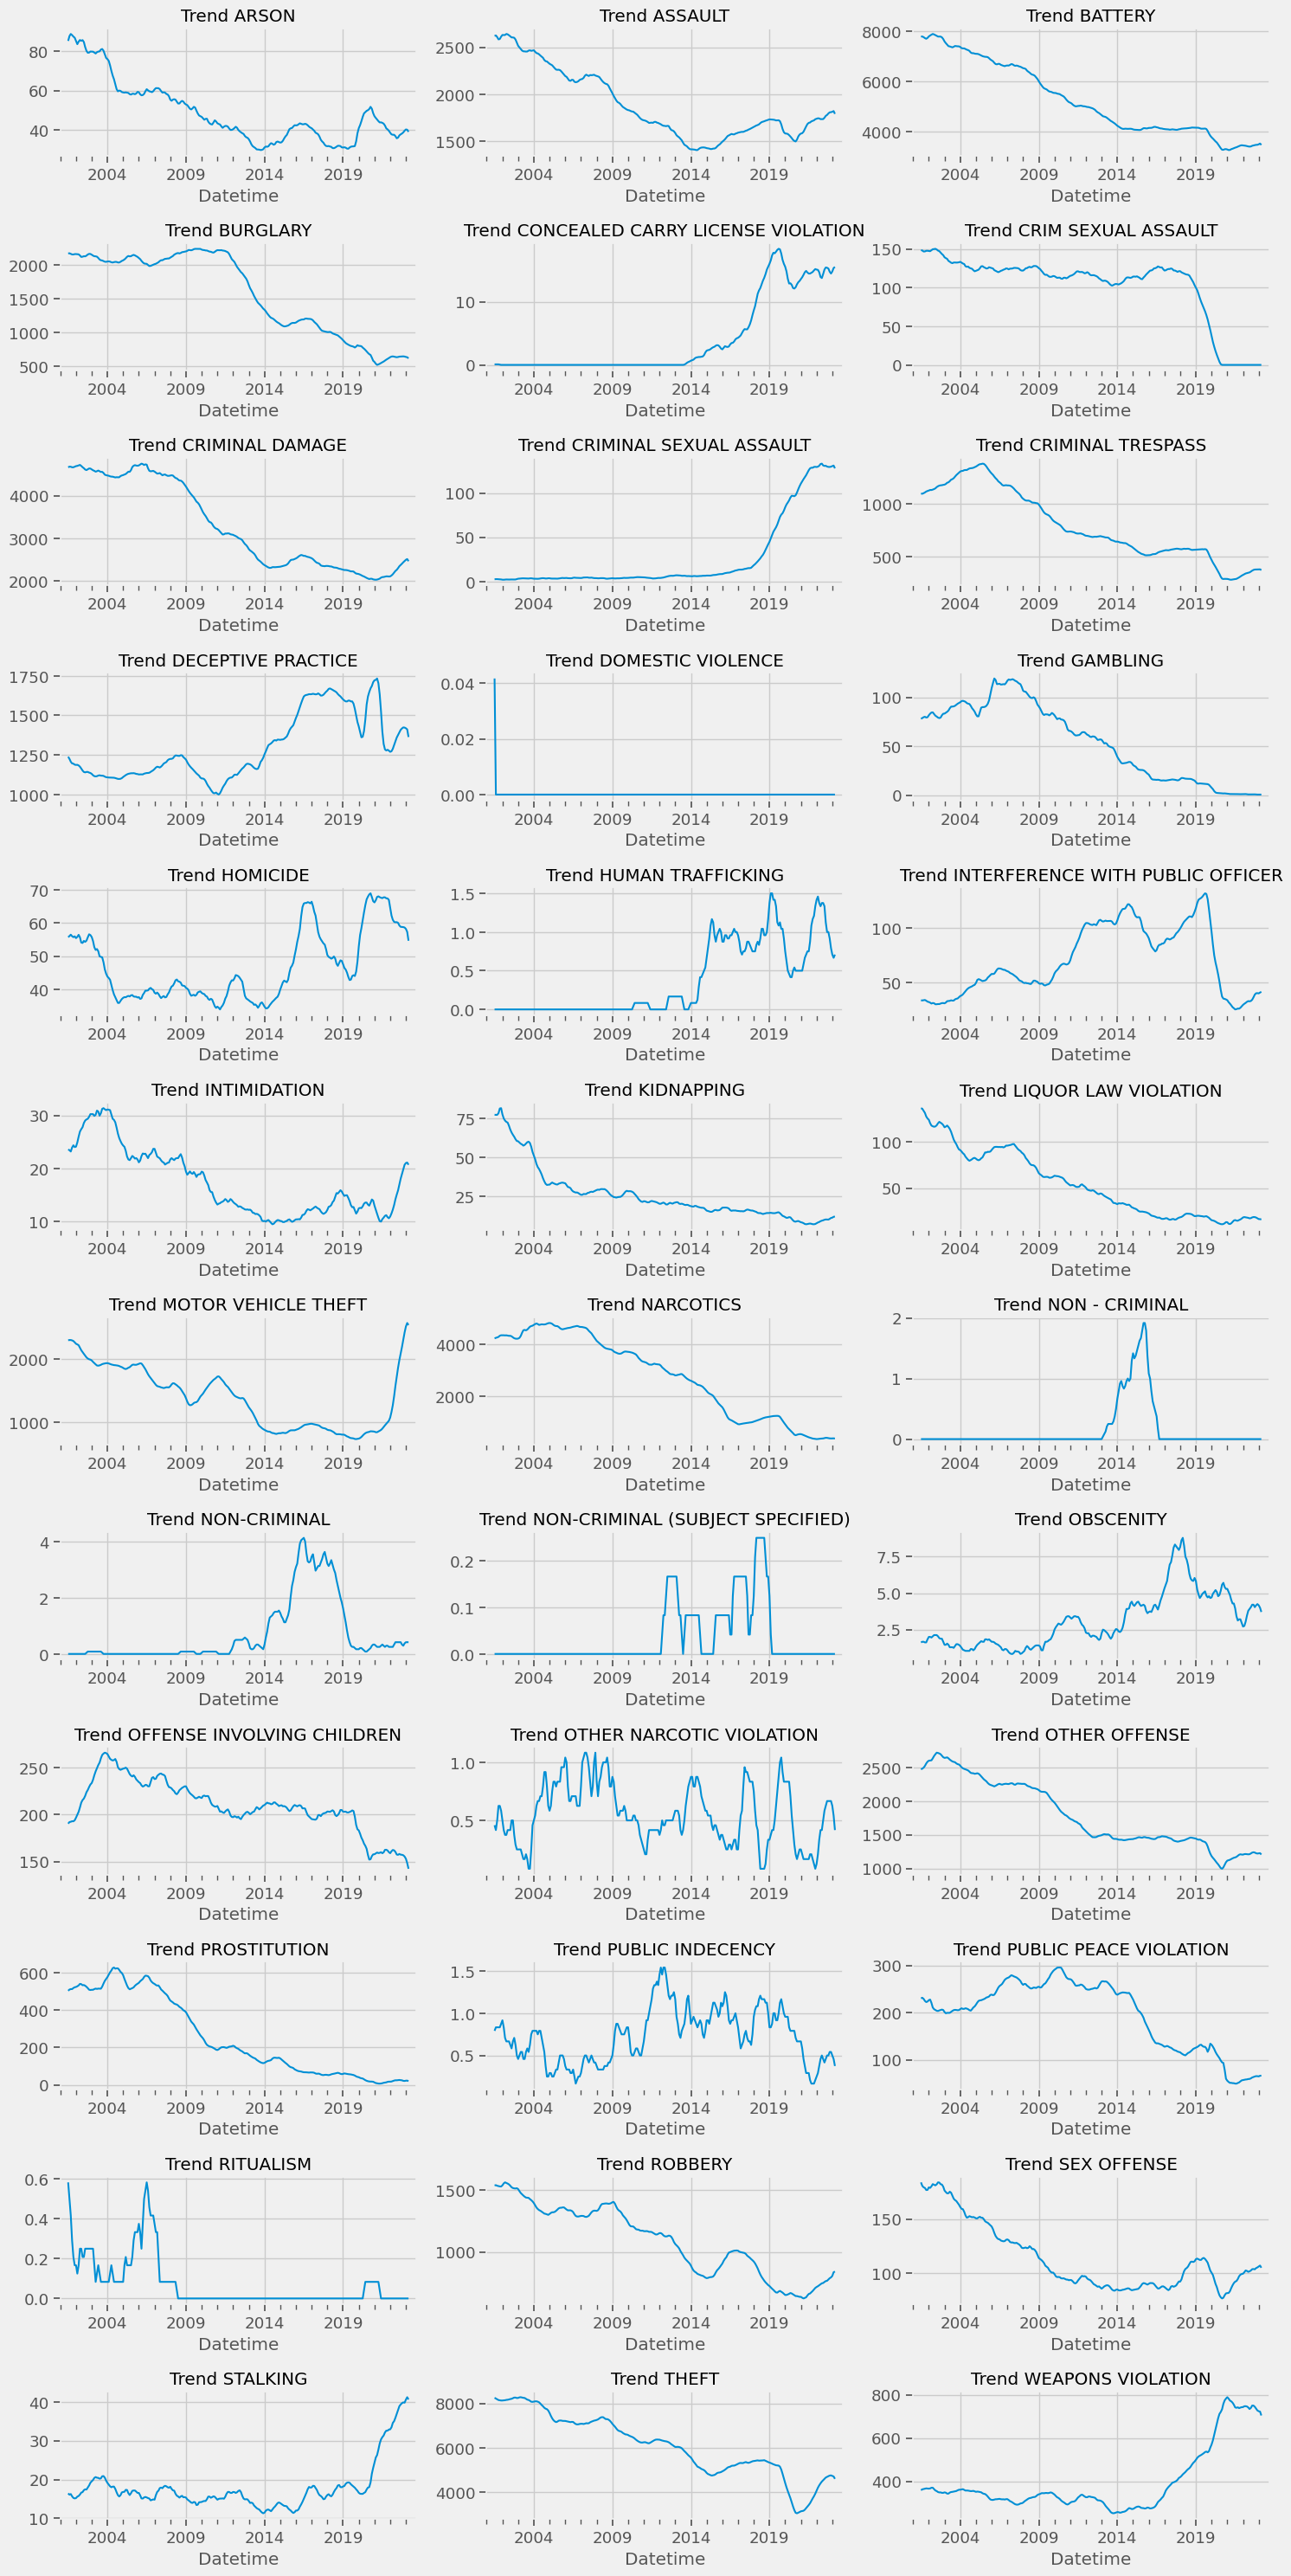

In [30]:
fig, axes = plt.subplots(12, 3, figsize=(15,30))

for indx, crime in enumerate(plot_type.columns):
    row = indx // 3
    col = indx % 3
    ts = plot_type[crime]
    decomp = tsa.seasonal_decompose(ts)
    
    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout()

- **Is the total number of crimes increasing or decreasing across the years?**
    - *From 2001 to 2023, crime has decreased.*


- **Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?**
    - *Seems to be some crimes have trended up, in contrast to the general trend down:*

        - 'CONCEALED CARRY LICENSE VIOLATION'
        - 'DECEPTIVE PRACTICES'
        - 'HOMICIDE'
        - 'HUMAN TRAFFICKING'
        - 'VEHICLE THEFT' (very recently has spiked)
        - 'OBSCENITY'
        - 'STALKING'
        - 'WEAPONS VIOLATION'

## **3) Comparing Months:**

- **What months have the most crime? What months have the least?**
    - *The most crime seems to occur during the Summer months (May to August)*
    - *The least crime occurs during the Winter months (November to February)*


- **Are there any individual crimes that do not follow this pattern? If so, which crimes?**

- *Some Crimes do seem to buck the overall trend (does not create a distinct "hump" during the Summer Months)*
    - 'DECEPTIVE PRACTICE'
    - 'NARCOTICS' (has more of a continuous downward trend)
    - 'OBSCENITY'
    - 'OFFENSE INVOLVING CHILDREN'
    - 'RITUALISM' (drops substantially April to July and spikes in August)

In [31]:
df4 = df.copy()

In [32]:
df4['Month'] = df4.index.month
df4['MonthName'] = df4.index.month_name()
df4.head(3)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Month,MonthName
Datetime,,,,,,,,,,,,
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,1,January
2019-01-01 01:00:00,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,1,January


In [33]:
# saving lookup for number vs name
unique_months = df4.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

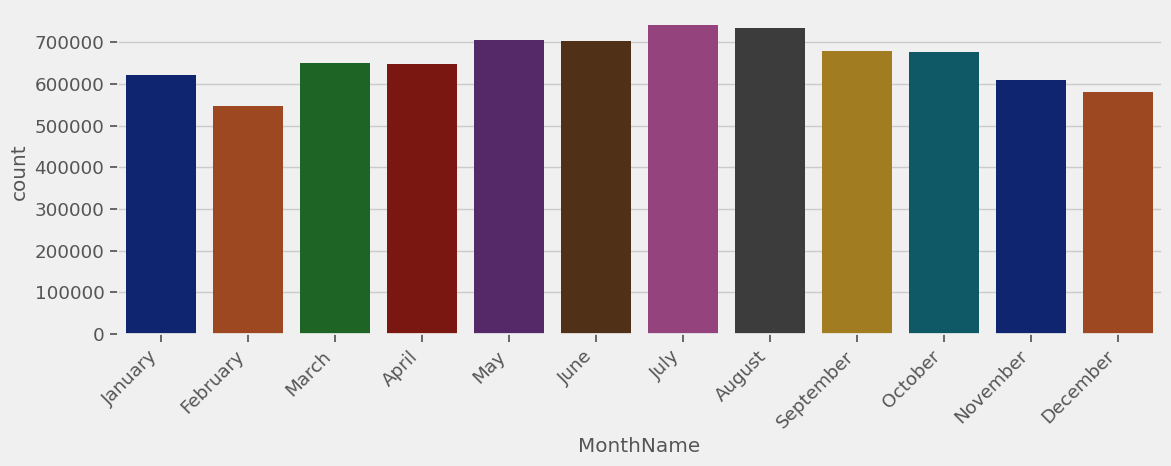

In [34]:
ax = sns.countplot(data=df4, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

### Visualization Count of Crimes per Month

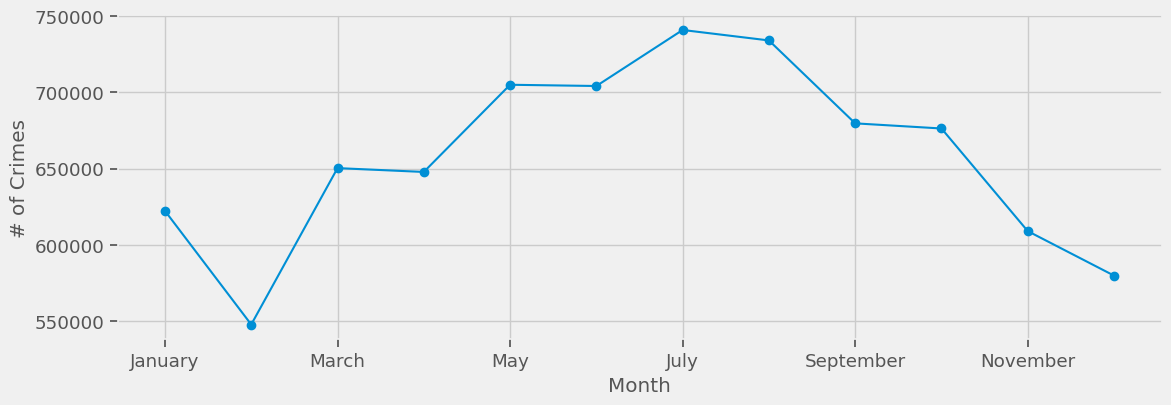

In [35]:
## save month counts
# month_lookup.values() will reorder df['MonthName'].value_counts() by month
month_counts = df4['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

### Any Crimes Going Against Monthly Trend?

In [36]:
df4

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Month,MonthName
Datetime,,,,,,,,,,,,
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,1,January
2019-01-01 01:00:00,THEFT,OVER $500,APARTMENT,False,True,1923,19.0,46.0,41.949460,-87.651974,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,RESIDENCE,False,False,1614,16.0,41.0,41.974061,-87.845200,1,January
2019-01-01 01:00:00,THEFT,FROM BUILDING,HOTEL/MOTEL,False,True,1834,18.0,42.0,41.893652,-87.622726,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003,12,December
2003-12-31 12:55:00,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319,12,December
2003-12-31 00:55:00,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656,12,December


In [37]:
plot_type4 = df4.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
plot_type4

Primary Type       Month  MonthName
ARSON              1      January        963
                   2      February       841
                   3      March         1140
                   4      April         1134
                   5      May           1284
                                       ...  
WEAPONS VIOLATION  8      August       10689
                   9      September     9815
                   10     October       9190
                   11     November      7953
                   12     December      7403
Length: 415, dtype: int64

In [38]:
plot_type4_df = plot_type4.to_frame('# of Crimes').reset_index()
plot_type4_df

,Primary Type,Month,MonthName,# of Crimes
0,ARSON,1,January,963
1,ARSON,2,February,841
2,ARSON,3,March,1140
3,ARSON,4,April,1134
4,ARSON,5,May,1284
...,...,...,...,...
410,WEAPONS VIOLATION,8,August,10689
411,WEAPONS VIOLATION,9,September,9815
412,WEAPONS VIOLATION,10,October,9190
413,WEAPONS VIOLATION,11,November,7953


In [39]:
plot_type4.index

MultiIndex([(            'ARSON',  1,   'January'),
            (            'ARSON',  2,  'February'),
            (            'ARSON',  3,     'March'),
            (            'ARSON',  4,     'April'),
            (            'ARSON',  5,       'May'),
            (            'ARSON',  6,      'June'),
            (            'ARSON',  7,      'July'),
            (            'ARSON',  8,    'August'),
            (            'ARSON',  9, 'September'),
            (            'ARSON', 10,   'October'),
            ...
            ('WEAPONS VIOLATION',  3,     'March'),
            ('WEAPONS VIOLATION',  4,     'April'),
            ('WEAPONS VIOLATION',  5,       'May'),
            ('WEAPONS VIOLATION',  6,      'June'),
            ('WEAPONS VIOLATION',  7,      'July'),
            ('WEAPONS VIOLATION',  8,    'August'),
            ('WEAPONS VIOLATION',  9, 'September'),
            ('WEAPONS VIOLATION', 10,   'October'),
            ('WEAPONS VIOLATION', 11,  'November

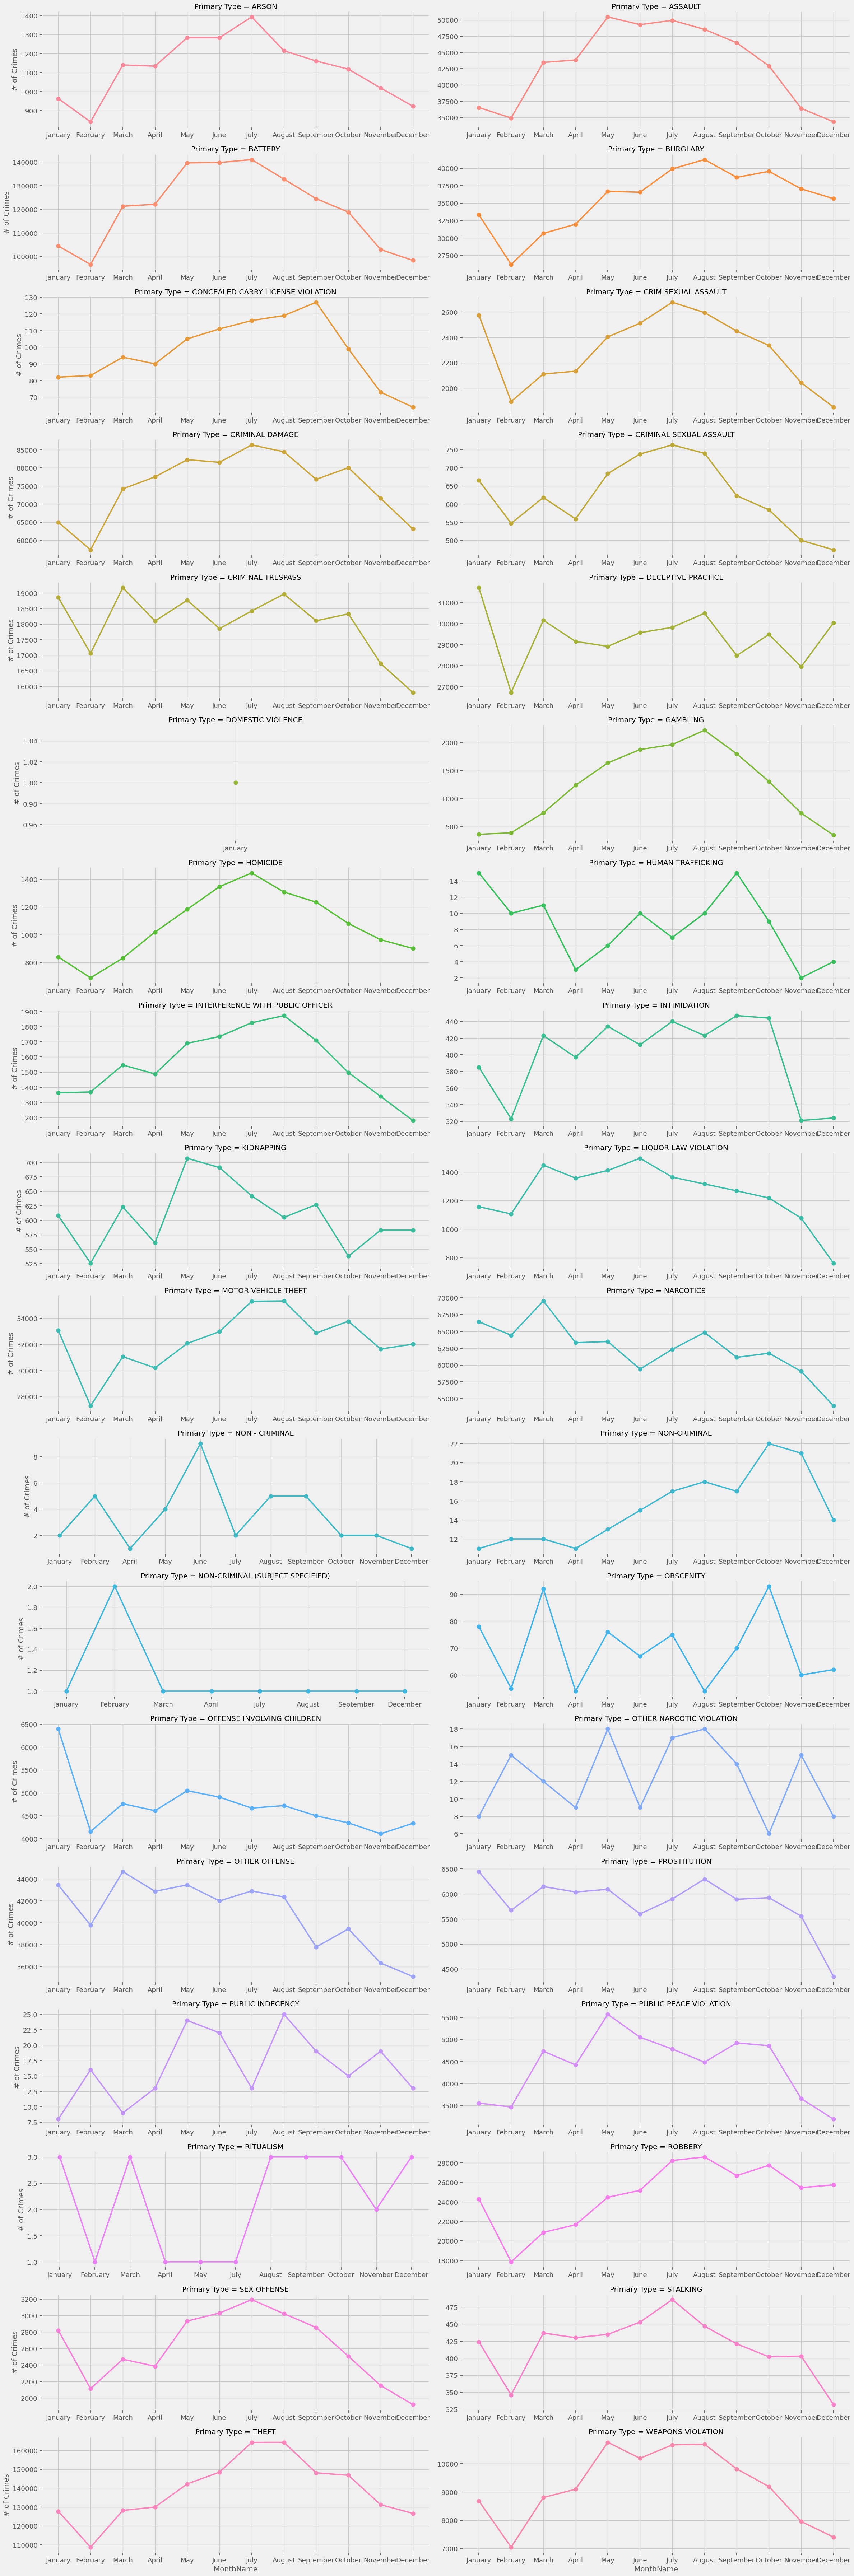

In [40]:
g = sns.catplot(data=plot_type4_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- **What months have the most crime? What months have the least?**
    - The most crime seems to occur during the Summer months 
     - May to August
    - The least crime occurs during the Winter months 
     - November to February


- **Are there any individual crimes that do not follow this pattern? If so, which crimes?**

 - Some Crimes do seem to buck the overall trend (does not create a distinct "hump" during the Summer Months)*
    - 'DECEPTIVE PRACTICE'
    - 'OBSCENITY'
    - 'OFFENSE INVOLVING CHILDREN'
    - 'RITUALISM' 
     - drops substantially April to July and spikes in August
    - 'NARCOTICS' 
     - has more continuous downward trend